In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
# from adjustText import adjust_text
import array as arr
import torch

# %pip install eqtransformer
# %pip install adjustText
# %pip install openpyxl

In [2]:
# Use GPU
torch.cuda.is_available()

True

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# Read the catalog
cat_ds03 = pd.read_excel("ds03.xlsx")

In [5]:
# Show the catalog
cat_ds03

,CI YEAR,CLUSTER ID,STATION,NETWORK CODE,FILTER USED (Hz)
0,1,OC1,J25A,7D,HP 5
1,1,NaN,M08A,7D,HP 5
2,1,NaN,I02D,TA,HP 5
3,1,OC2,J25A,7D,BP 5-10
4,1,NaN,J33A,7D,BP 5-15
...,...,...,...,...,...
247,4,CI4-45,FC03D,7D,BP 1-15
248,4,NaN,HEBO,UW,BP 2-10
249,4,CI4-47,NLWA,US,HP 3
250,4,CI4-48,OCP,UW,BP 3-10


In [6]:
# Find filter the stations by the network code 7D
cat_7D = cat_ds03[cat_ds03['NETWORK CODE']=='7D']

In [7]:
# Show the stations by the network code 7D
cat_7D['STATION']

0       J25A
1       M08A
3       J25A
4       J33A
8       J41A
       ...  
239     G33D
241     G33D
243     J09D
246     J17D
247    FC03D
Name: STATION, Length: 94, dtype: object

In [12]:
# Convert station series to a list
stations= (cat_7D['STATION']).tolist()
stations

['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B  ',
 'G10B  ',
 'G10B  ',
 'FS09B  ',
 'FS13B  ',
 'FS13B  ',
 'FS13B  ',
 'FS16B  ',
 'G10B',
 'FS17B  ',
 'G19B  ',
 'M14B  ',
 'M14B  ',
 'G19B  ',
 'G19B  ',
 'M14B  ',
 'G17B',
 'G17B',
 'G19B  ',
 'G26B  ',
 'G27B  ',
 'G25B  ',
 'G26B  ',
 'M12B  ',
 'M12B  ',
 'G25B  ',
 'M12B  ',
 'M12B  ',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C ',
 'J25C ',
 'M05C ',
 'M06C ',
 'FN02C ',
 'FN02C ',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C ',
 'J34C',
 'M06C ',
 'M05C ',
 'M06C ',
 'J42C',
 'M06C ',
 'J41C',
 'M05C ',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [13]:
# Delete the spaces in the station code strings.
for i in range(len(stations)):
    s = stations[i]
    stations[i]= s.replace(" ", "")
        
stations


['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B',
 'G10B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'FS17B',
 'G19B',
 'M14B',
 'M14B',
 'G19B',
 'G19B',
 'M14B',
 'G17B',
 'G17B',
 'G19B',
 'G26B',
 'G27B',
 'G25B',
 'G26B',
 'M12B',
 'M12B',
 'G25B',
 'M12B',
 'M12B',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C',
 'J25C',
 'M05C',
 'M06C',
 'FN02C',
 'FN02C',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C',
 'J34C',
 'M06C',
 'M05C',
 'M06C',
 'J42C',
 'M06C',
 'J41C',
 'M05C',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [10]:
# Converge the all the strings to a single string listing the stations delimited by commas with no spaces
from functools import reduce
 

delim = ","
 
stations = reduce(lambda x, y: str(x) + delim + str(y), stations)
 
stations

'J25A,M08A,J25A,J33A,J41A,J49A,J65A,J57A,J65A,M09B,J25B,J25B,J33B,FS13B,FS20B,G10B,FS16B,G10B,G10B,FS09B,FS13B,FS13B,FS13B,FS16B,G10B,FS17B,G19B,M14B,M14B,G19B,G19B,M14B,G17B,G17B,G19B,G26B,G27B,G25B,G26B,M12B,M12B,G25B,M12B,M12B,J09B,J33B,J25C,M08C,J33C,J25C,M05C,M06C,FN02C,FN02C,J26C,J34C,J26C,J34C,M06C,J34C,M06C,M05C,M06C,J42C,M06C,J41C,M05C,J42C,J65C,M03C,J67C,M01C,FS16D,FS09D,FS17D,FS14D,FS44D,FS43D,FS17D,FS41D,FS13D,G09D,FS45D,G10D,M17D,M16D,G18D,M15D,M15D,G33D,G33D,J09D,J17D,FC03D'

In [11]:
# Get station inventory from obspy
from obspy.clients.fdsn.client import Client
stations = stations
network = '7D'
channels = 'HH*'
client = Client("IRIS")
inventory = client.get_stations(network=network, station=stations)

In [12]:
start_dates = [] # Make a list to contain all the start dates 
end_dates = [] # Make a list to contain all the end dates 
latitudes = np.zeros(len(inventory[0])) # Make a list to contain all the latitudes

for i in range(len(inventory[0])): 
    start_dates.append(inventory[0][i].start_date.datetime)
    end_dates.append(inventory[0][i].end_date.datetime)
    latitudes[i] = inventory[0][i].latitude

# Find the latitudes less than 42 degrees. 
a = latitudes
index_lat_less_than_42 = np.asarray(np.where(42 >= a))
print(type(index_lat_less_than_42))

latitudes = latitudes.tolist()

# Convert inventory to a np.array
inventory_codes = []
for i in range(len(inventory[0])):
    inventory_codes.append(inventory[0][i].code)

<class 'numpy.ndarray'>


In [14]:
# Filter stations by deployment dates
from datetime import datetime
t1 = datetime(2012,7, 1)
t2 = datetime(2012,12, 31)
keep = [i for i,e in enumerate(start_dates) if (e > t1) and (e < t2)]
filtered_stations = [inventory_codes[i] for i in keep]

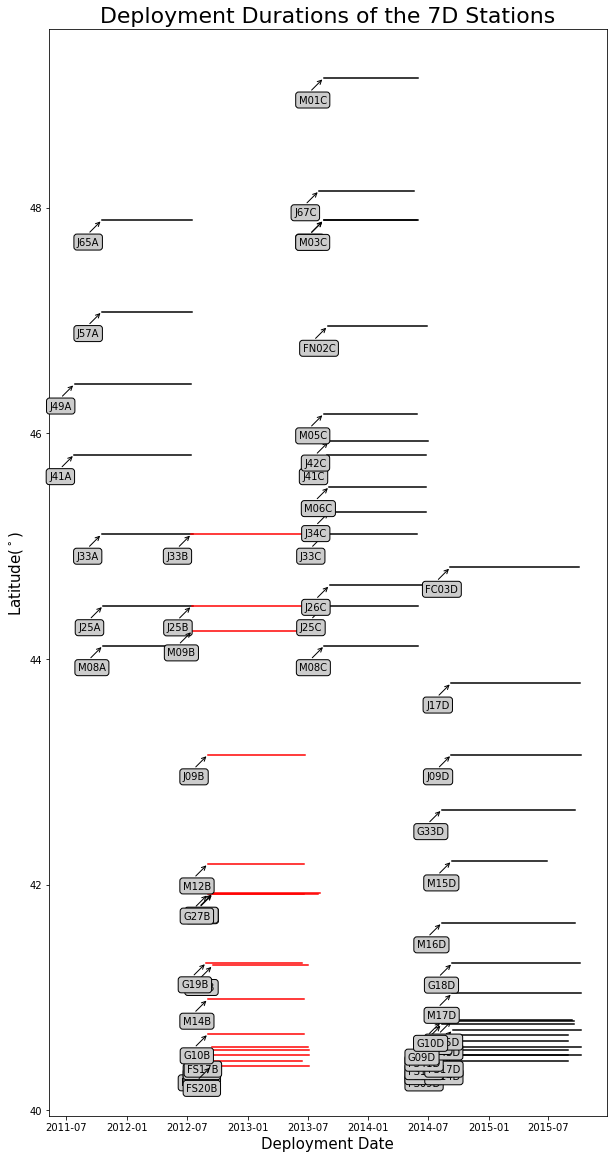

In [15]:
#  Plot the stations one more time to see if the previous code was right
# Plot the start and end dates with respect to the latitudes
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=45,rad=10")

offset = 25


plt.figure(figsize=(10,20))
for i in range(len(inventory_codes)):
    if (start_dates[i] > t1) and (start_dates[i] < t2):
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='r', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
    else:
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='black', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
# plt.ylim(40,46)
# plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

plt.show()